In [3]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [4]:
#df = pd.read_csv('D:/BRAC/Thesis/data/Heart_Disease_PredictionVJ.csv')
df = pd.read_csv('D:/BRAC/Thesis/data/recent/heart_rajniKant_11days.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
target_col = "target"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=42)

In [7]:
grad=GradientBoostingClassifier(n_estimators =150, learning_rate =0.2)  ##150,-2
grad.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=150)

In [55]:
y_pred = grad.predict(X_test)
accuracy_score(y_test, y_pred)

0.9823008849557522

In [56]:
f1_score(y_test, y_pred)

0.9818181818181818

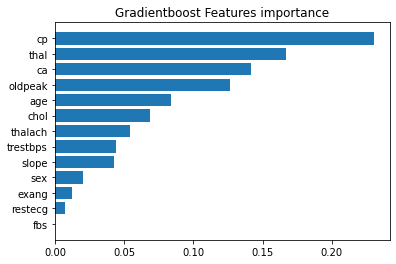

In [18]:
fe=X.columns
fe_im=grad.feature_importances_
sorted_in=np.argsort(fe_im)
pos=np.arange(sorted_in.shape[0])+.5
plt.barh(pos, fe_im[sorted_in], align='center')
plt.yticks(pos, fe[sorted_in])
plt.title('Gradientboost Features importance')
plt.show()


Confusion matrix:
 [[171   0]
 [  6 162]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       171
           1       1.00      0.96      0.98       168

    accuracy                           0.98       339
   macro avg       0.98      0.98      0.98       339
weighted avg       0.98      0.98      0.98       339



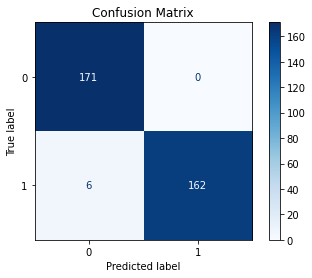

In [19]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n',confusion_matrix)
print('\nClassification report:\n',metrics.classification_report(y_test, y_pred))
# plot confusion matrix
disp = metrics.plot_confusion_matrix(grad, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.savefig('Confusion Matrix')

In [20]:
accuracy= accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
error_rate     #classification error

0.017699115044247815

In [42]:
#tune the hyperparameters
from sklearn.model_selection import GridSearchCV
LR= {'learning_rate': [0.5, 0.1, 1.0, 0.2],
     'n_estimators':[100,150,200,250,300]}

tuning = GridSearchCV(estimator = GradientBoostingClassifier(),
                   param_grid = LR )
                   # scoring = 'F1')
tuning.fit(X_train, y_train)
tuning.best_params_, tuning.best_score_ 

({'learning_rate': 1.0, 'n_estimators': 100}, 0.9650269755633133)